In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle

from matplotlib.ticker import LogLocator
import matplotlib.ticker as ticker

plt.rc('text', usetex=True)

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'cmr10'  # Computer Modern Roman
mpl.rcParams['font.size'] = 12  # Adjust the font size as needed

In [13]:
with open('/Users/adamboesky/Research/ay98/Weird_Galaxies/final_host_prop_train_history.pkl', 'rb') as f:
    host_prop_train_history = pickle.load(f)
with open('/Users/adamboesky/Research/ay98/Weird_Galaxies/final_domain_transfer_train_history.pkl', 'rb') as f:
    domain_transfer_train_history = pickle.load(f)

/var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/ipykernel_62462/2231314084.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(2, 1, figsize=(8, 6))


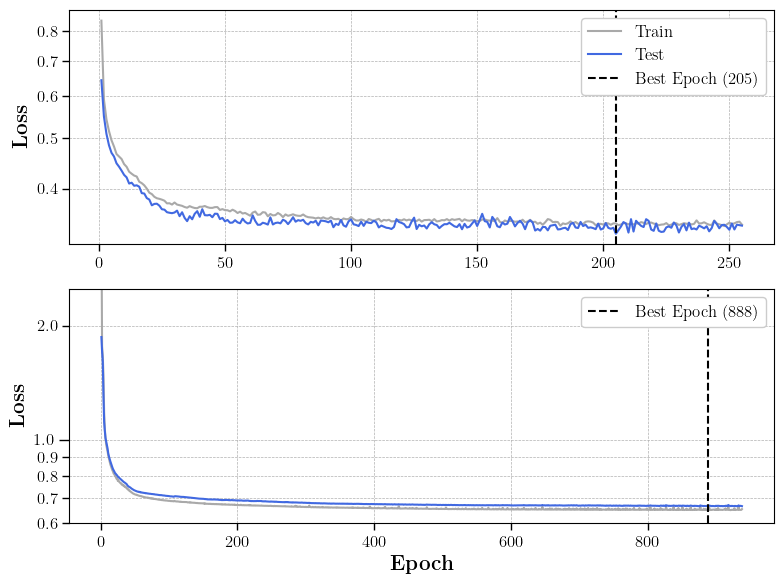

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
fs = 15

# HOST PROP
axes[0].grid(True, which="both", ls="--", lw=0.5)
axes[0].set_yscale('log')

# Plot the prop inference training history
epochs = np.arange(0, len(host_prop_train_history['train']), 1) + 1
axes[0].plot(epochs, host_prop_train_history['train'], label='Train', color='darkgray')
axes[0].plot(epochs, host_prop_train_history['test'], label='Test', color='royalblue')
axes[0].set_ylabel(r'\textbf{Loss}', fontsize=fs)
axes[0].tick_params(axis='y', which='major', length=7, width=1)  # Adjust major tick size
axes[0].tick_params(axis='x', which='major', length=5, width=1)  # Adjust major tick size
axes[0].tick_params(axis='y', which='minor', length=5, width=1)  # Adjust minor tick size
best_epoch = np.argmin(host_prop_train_history['test']) + 1
axes[0].axvline(x=best_epoch, linestyle='--', color='k', label=f'Best Epoch ({best_epoch})')
axes[0].legend(loc='upper right', framealpha=1)

# SED
axes[1].grid(True, which="both", ls="--", lw=0.5)
axes[1].set_yscale('log')

# Plot the prop inference training history
epochs = np.arange(0, len(domain_transfer_train_history['train']), 1) + 1
axes[1].plot(epochs, domain_transfer_train_history['train'], color='darkgray')
axes[1].plot(epochs, domain_transfer_train_history['test'], color='royalblue')
axes[1].set_xlabel(r'\textbf{Epoch}', fontsize=fs)
axes[1].set_ylabel(r'\textbf{Loss}', fontsize=fs)
axes[1].tick_params(axis='y', which='major', length=7, width=1)  # Adjust major tick size
axes[1].tick_params(axis='x', which='major', length=5, width=1)  # Adjust major tick size
axes[1].tick_params(axis='y', which='minor', length=5, width=1)  # Adjust minor tick size
best_epoch = np.argmin(domain_transfer_train_history['test']) + 1
axes[1].axvline(x=best_epoch, linestyle='--', color='k', label=f'Best Epoch ({best_epoch})')
axes[1].legend(loc='upper right', framealpha=1)
axes[1].set_ylim((0.6, 2.5))

def integer_formatter(x, pos):
    """Attempt to format tick labels as integers, ignoring the position."""
    return f"{round(x, 1)}"


# Apply the custom formatter to each axis
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(integer_formatter))
    ax.yaxis.set_minor_formatter(ticker.FuncFormatter(integer_formatter))


plt.tight_layout()
plt.savefig('Figures/combined_train_history.pdf', bbox_inches='tight')